# Using Python for Research Homework: Week 4, Case Study 2

In this case study, we will continue taking a look at patterns of flight for each of the three birds in our dataset.

In [3]:
# DO NOT EDIT THIS CODE
import pandas as pd
import numpy as np
birddata = pd.read_csv("https://courses.edx.org/asset-v1:HarvardX+PH526x+2T2019+type@asset+block@bird_tracking.csv", index_col=0)
print(birddata.describe())

           altitude  device_info_serial     direction      latitude  \
count  61920.000000        61920.000000  61477.000000  61920.000000   
mean      52.313275          849.328505     -4.610841     30.227762   
std      136.435498           12.835870    102.786009     14.809813   
min    -1010.000000          833.000000   -179.997929     12.354424   
25%        2.000000          833.000000    -89.679759     15.393138   
50%       14.000000          851.000000    -10.983115     30.424481   
75%       84.000000          864.000000     81.964778     49.999572   
max     6965.000000          864.000000    180.000000     51.518452   

          longitude      speed_2d  
count  61920.000000  61477.000000  
mean      -8.953367      2.558987  
std        8.478471      3.576039  
min      -17.626145      0.000000  
25%      -16.761302      0.410000  
50%       -9.662089      1.209049  
75%        2.603591      3.059444  
max        4.857561     63.488066  


### Exercise 1

In this case study, we will continue taking a look at patterns of flight for each of the three birds in our dataset. We will group the flight patterns by bird and date, and plot the mean altitude for these groupings.

`pandas` makes it easy to perform basic operations on groups within a dataframe without needing to loop through each value in the dataframe. In this exercise, we will group the dataframe by `birdname` and then find the average `speed_2d` for each bird.

#### Instructions 
- Fill in the code to find the mean altitudes of each bird using the pre-loaded `birddata` dataframe. 

In [2]:
# First, use `groupby()` to group the data by "bird_name".
grouped_birds = birddata.groupby("bird_name")
print(len(grouped_birds))
grouped_birds.head()
# Now calculate the mean of `speed_2d` using the `mean()` function.
mean_speeds = grouped_birds.speed_2d.mean()


# Find the mean `altitude` for each bird.
mean_altitudes = grouped_birds.altitude.mean()

print (mean_speeds, mean_altitudes)

3
bird_name
Eric     2.300545
Nico     2.908726
Sanne    2.450434
Name: speed_2d, dtype: float64 bird_name
Eric     60.249406
Nico     67.900478
Sanne    29.159922
Name: altitude, dtype: float64


### Exercise 2

In this exercise, we will group the flight times by date and calculate the mean altitude within that day.

#### Instructions 
- Convert `birddata.date_time` to the `pd.datetime` format, and store as `birddata["date"]`.
- Fill in the code to find the mean altitudes for each day.

In [4]:
# Convert birddata.date_time to the `pd.datetime` format.
import datetime as dt
ts=[]
for i in range(len(birddata)):
    ts.append(dt.datetime.strptime(birddata.date_time.iloc[i][0:-12],"%Y-%m-%d"))
#birddata.date = pd.to_datetime(birddata.date_time)
print (ts[0:5])

# Create a new column of day of observation
birddata["date"] = ts 

# Use `groupby()` to group the data by date.
grouped_bydates = birddata.groupby("date")
print (len(grouped_bydates))

# Find the mean `altitude` for each date.
mean_altitudes_perday = grouped_bydates.altitude.mean()
print (mean_altitudes_perday[0:100])


[datetime.datetime(2013, 8, 15, 0, 0), datetime.datetime(2013, 8, 15, 0, 0), datetime.datetime(2013, 8, 15, 0, 0), datetime.datetime(2013, 8, 15, 0, 0), datetime.datetime(2013, 8, 15, 0, 0)]
259
date
2013-08-15    134.092000
2013-08-16    134.839506
2013-08-17    147.439024
2013-08-18    129.608163
2013-08-19    180.174797
                 ...    
2013-11-18    153.695279
2013-11-19     45.491597
2013-11-20     41.600823
2013-11-21     36.174797
2013-11-22     49.877551
Name: altitude, Length: 100, dtype: float64


### Exercise 3

In this exercise, we will group the flight times by both bird and date, and calculate the mean altitude for each.

#### Instructions 
- `birddata` already contains the `date` column. To find the average speed for each bird and day, create a new grouped dataframe called `grouped_birdday` that groups the data by both `bird_name` and date.

In [8]:
# Use `groupby()` to group the data by bird and date.
grouped_birdname = birddata.groupby(["date","bird_name"])
#print(grouped_birdname)
# Find the mean `altitude` for each bird and date.
mean_altitudes_perday = grouped_birdname.altitude.mean()
print(mean_altitudes_perday[0:20])

date        bird_name
2013-08-15  Eric          74.988095
            Nico         222.421687
            Sanne        105.578313
2013-08-16  Eric         127.773810
            Nico         181.740741
            Sanne         93.743590
2013-08-17  Eric         125.890244
            Nico         216.595238
            Sanne         96.912500
2013-08-18  Eric         121.353659
            Nico         166.409639
            Sanne         99.887500
2013-08-19  Eric         134.928571
            Nico         291.679012
            Sanne        115.592593
2013-08-20  Eric         101.792683
            Nico         345.951220
            Sanne        104.666667
2013-08-21  Eric         160.518072
            Nico         198.095238
Name: altitude, dtype: float64


### Exercise 4

Great! Now find the average speed for each bird and day.

#### Instructions 

- Store these are three `pandas` `Series` objects, one for each bird.
- Use the plotting code provided to plot the average speeds for each bird.

date
2013-08-15    2.121517
2013-08-16    2.618113
2013-08-17    1.765809
2013-08-18    2.951171
2013-08-19    2.435545
                ...   
2014-04-26    2.262308
2014-04-27    2.667432
2014-04-28    2.159156
2014-04-29    2.371772
2014-04-30    2.548936
Name: speed_2d, Length: 252, dtype: float64
date
2013-08-15    3.392506
2013-08-16    2.328489
2013-08-17    2.124465
2013-08-18    3.064796
2013-08-19    2.542491
                ...   
2014-04-26    1.056218
2014-04-27    2.439322
2014-04-28    3.344398
2014-04-29    2.220966
2014-04-30    1.814705
Name: speed_2d, Length: 259, dtype: float64
date
2013-08-15    2.856924
2013-08-16    3.386387
2013-08-17    3.123210
2013-08-18    2.785776
2013-08-19    2.920577
                ...   
2014-04-26    2.192028
2014-04-27    2.582072
2014-04-28    3.055051
2014-04-29    2.793232
2014-04-30    3.297032
Name: speed_2d, Length: 259, dtype: float64


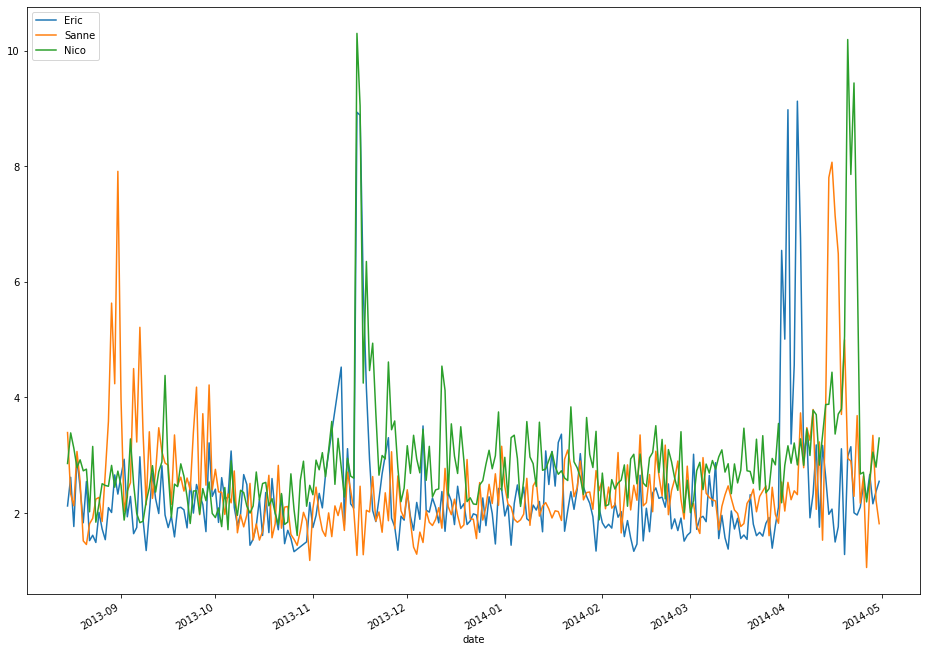

In [8]:
import matplotlib.pyplot as plt

eric_daily_speed  = grouped_birdname.speed_2d.mean()["Eric"]
print(eric_daily_speed)
sanne_daily_speed  = grouped_birdname.speed_2d.mean()["Sanne"]
print(sanne_daily_speed)
nico_daily_speed  = grouped_birdname.speed_2d.mean()["Nico"]
print(nico_daily_speed)
#sanne_daily_speed = grouped_birdname.speed_2d[name=="Sanne"].mean()
#nico_daily_speed  = grouped_birdname.speed_2d[name=="Nico"].mean()
plt.figure(figsize=(16,12))
eric_daily_speed.plot(label="Eric")
sanne_daily_speed.plot(label="Sanne")
nico_daily_speed.plot(label="Nico")
plt.legend(loc="upper left")
plt.show()